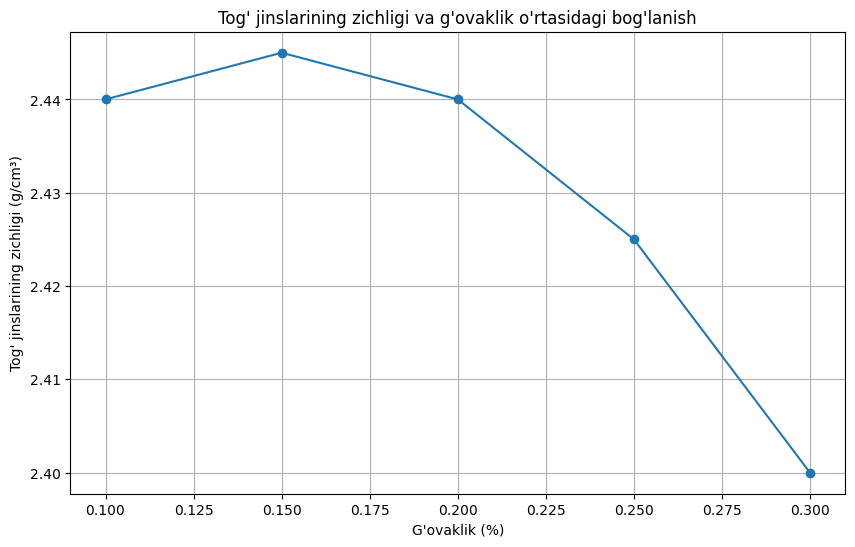

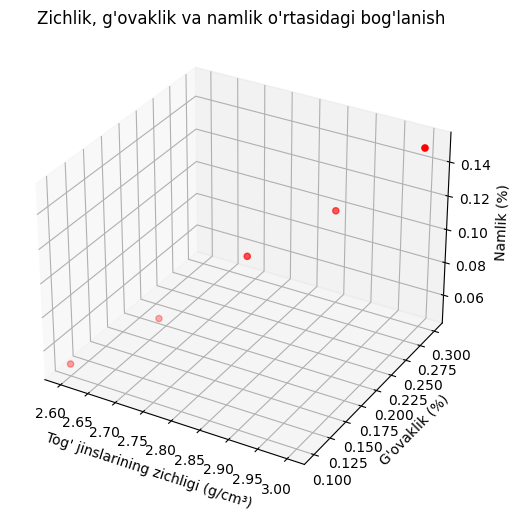

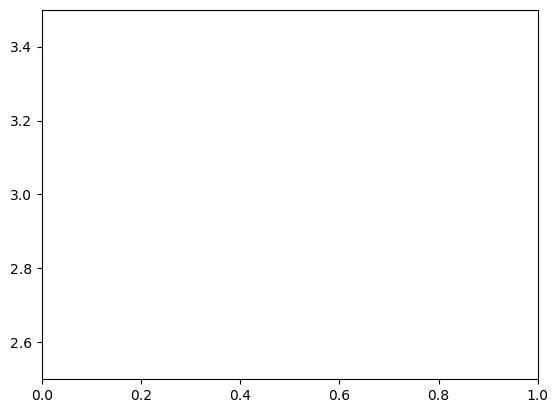

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Misol ma'lumotlari
density = np.array([2.6, 2.7, 2.8, 2.9, 3.0])  # Tog' jinslarining zichligi (g/cm³)
porosity = np.array([0.1, 0.15, 0.2, 0.25, 0.3])  # G'ovaklik (foiz)
moisture = np.array([0.05, 0.07, 0.1, 0.12, 0.15])  # Namlik (foiz)
filler_density = 1.0  # G'ovakliklarni to'ldiruvchi zichlik (g/cm³)

# Zichlikni hisoblash formulasi
def calculate_density(rock_density, porosity, filler_density):
    return rock_density * (1 - porosity) + filler_density * porosity

# Hisoblangan zichlik qiymatlari
calculated_density = calculate_density(density, porosity, filler_density)

# 2D Grafika
plt.figure(figsize=(10, 6))
plt.plot(porosity, calculated_density, marker='o')
plt.xlabel('G\'ovaklik (%)')
plt.ylabel('Tog\' jinslarining zichligi (g/cm³)')
plt.title('Tog\' jinslarining zichligi va g\'ovaklik o\'rtasidagi bog\'lanish')
plt.grid(True)
plt.show()

# 3D Grafika
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(density, porosity, moisture, c='r', marker='o')
ax.set_xlabel('Tog\' jinslarining zichligi (g/cm³)')
ax.set_ylabel('G\'ovaklik (%)')
ax.set_zlabel('Namlik (%)')
ax.set_title('Zichlik, g\'ovaklik va namlik o\'rtasidagi bog\'lanish')
plt.show()

# Animatsiya yaratish
fig, ax = plt.subplots()
line, = ax.plot([], [], 'r-')

def init():
    ax.set_xlim(0, 1)
    ax.set_ylim(2.5, 3.5)
    return line,

def update(frame):
    y = calculate_density(density, porosity + frame * 0.01, filler_density)
    line.set_data(porosity, y)
    return line,

ani = FuncAnimation(fig, update, frames=np.arange(0, 10), init_func=init, blit=True)
plt.show()
